This ipython file is the project by Hongyi Tang and Weijian Li for course 12752.
There are four ipython files in the project in total. Each file consist of one cluster analysis task.
In this file, the cluster analysis is demonstrated to 4 building types.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

%matplotlib inline

Please download the dataset and change the file path.

In [3]:
# Read in CBECS data
data = pd.DataFrame.from_csv('C:/F16-12-752-master/projects/thongyi_weijian1/data/CBECS.csv') 
data.tail()

,REGION,CENDIV,PBA,FREESTN,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,RFTILT,...,FKCLBTU,FKWTBTU,FKCKBTU,FKOTBTU,DHHTBTU,DHCLBTU,DHWTBTU,DHCKBTU,DHOTBTU,PUBCLIM
PUBID,,,,,,,,,,,,,,,,,,,,,
6716,3,5,14,1.0,108000,7,1,6,2,1,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2
6717,3,7,5,1.0,1700,2,5,5,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
6718,2,3,26,1.0,2000,2,1,4,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6719,1,2,12,1.0,19250,4,1,4,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
6720,3,5,14,1.0,142000,7,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In this time, four building types are selected which are office, pubilc assembly, inpatient health center and service.

In [624]:
energydata=pd.DataFrame()
type_B=[2,13,16,26] # office, inpatient health care, service and public assembly 
type_C=[1,3,4,5,6,7,8,9,10,11,12,14,15,17,18,19,20,21,22,23,24,25,91]
data_type=data
data_type=data_type[data_type.NGUSED!=2]
for i in type_C:
    data_type=data_type[data_type.PBA!=i]
energydata['Building Type']=data_type.PBA
index=['ELBTU','NGBTU','ELVNBTU','NGHTBTU']
for i in index:
    energydata[i]=data_type[i]/data_type.SQFT


In [625]:
energydata = energydata.dropna(how='any')
energydata = energydata[~(energydata == 0).any(axis=1)]
PBA1=energydata['Building Type'].unique()
count=[]
for i in PBA1:
    count.append([energydata[energydata['Building Type']==i].shape[0],i])
count


[[714, 2], [244, 26], [226, 13], [283, 16]]

C:\Users\thong\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


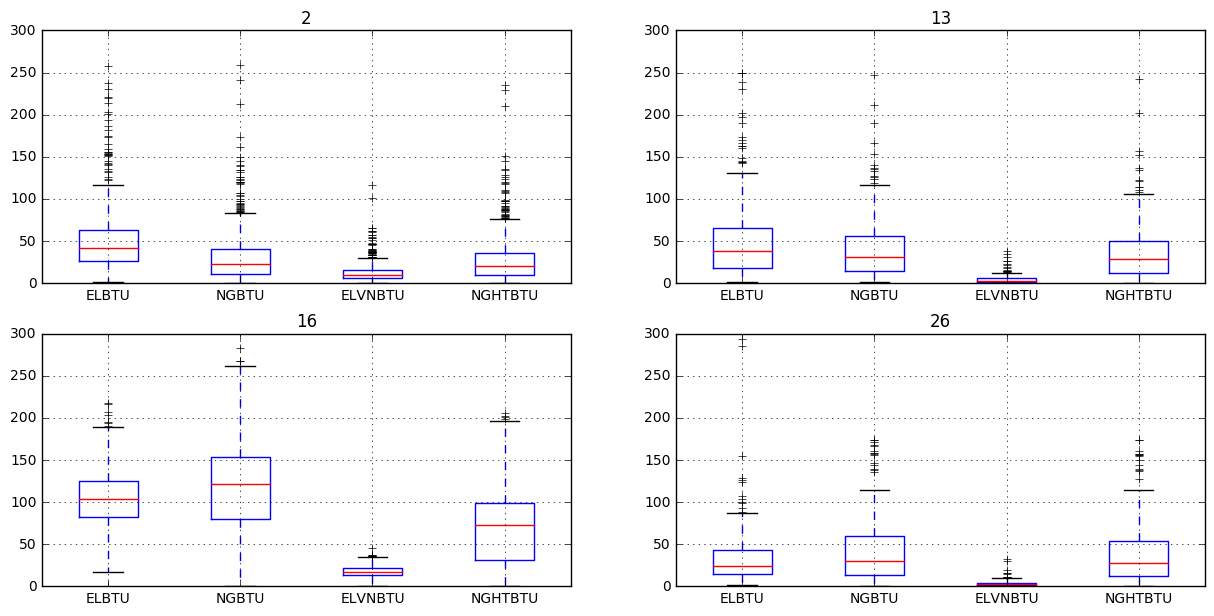

In [626]:
# energydata[energydata['Building Type']==2].boxplot()
fig1 = plt.figure(figsize=(15,15))
times=1
data_seperate=[]
# energydata[energydata['Building Type']==type_B[1]]
for i in range(len(type_B)):
    x=energydata[energydata['Building Type']==type_B[i]]
    x=x.drop(x.columns[0],axis=1)
    data_seperate.append(x) 
for i in range(len(type_B)):
    plt.subplot(len(type_B),2,times)
    data_seperate[i].boxplot()
    times=times+1
    plt.title(type_B[i])
    plt.ylim(0,300)

In [627]:
y=pd.DataFrame()
for i in range(len(type_B)):
    y=y.append(data_seperate[i])
X=y.as_matrix().astype(np.float32)


978
12
254
223


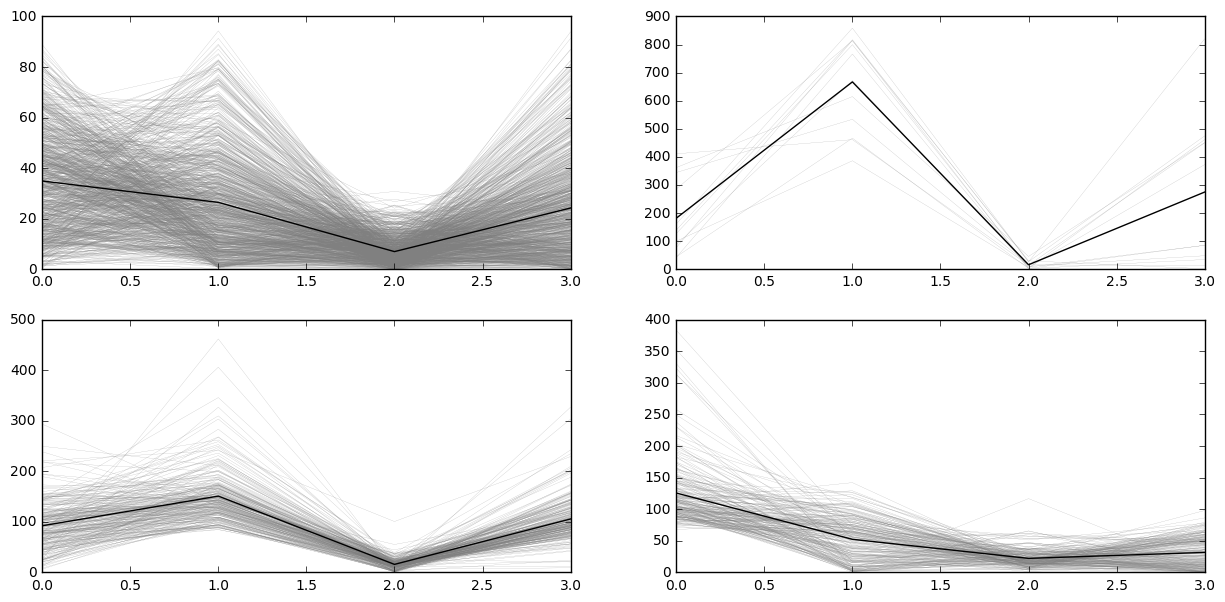

In [628]:
from sklearn.cluster import KMeans
num_clust = 4
clusters = KMeans(n_clusters=num_clust).fit(X)
cluster_assignments = clusters.predict(X)
# plt.subplot(num_clust+1,1,1)
# plt.plot(cluster_assignments[:150])
# plt.ylim([0.2,1.1])
fig2 = plt.figure(figsize=(15,15))
for cluster_id in range(len(clusters.cluster_centers_)):
    plt.subplot(num_clust,2,cluster_id+1)
    cluster_members = X[cluster_assignments==cluster_id,:]
    print(len(cluster_members))
    for i in range(len(cluster_members)):
        plt.plot(cluster_members[i,:], color='grey', lw='0.1')
    plt.plot(clusters.cluster_centers_[cluster_id,:], color='k', lw='1')
#     plt.ylim([-2000,2000])


There is a cluster only contains 12 samples. We treated them as weird data sample and delete them.

In [629]:
y['assignment']=cluster_assignments
y=y[y.assignment!=1] # The weird samples can locate in two different clusters 
# y=y[y.assignment!=3] #and the cluster number may be different every time run the code.
y=y.drop(y.columns[4],axis=1)
X=y.as_matrix().astype(np.float32)


,ELBTU,NGBTU,ELVNBTU,NGHTBTU
PUBID,,,,
9,59.424400,19.931467,17.621520,16.893707
11,42.062146,20.280000,18.361463,19.146244
18,10.216667,8.183000,2.971167,8.183000
20,37.380282,22.818521,14.557141,21.278775
36,30.185778,8.474478,13.816567,7.493933
51,41.638982,29.714506,14.336681,20.583518
69,111.319939,3.025333,33.627515,0.912000
100,25.897111,17.766667,7.408889,17.686444
108,20.873004,29.933220,6.394295,27.467557


After deleting the weired data sample, the cluster analysis result is much reasonable.

867
166
180
242


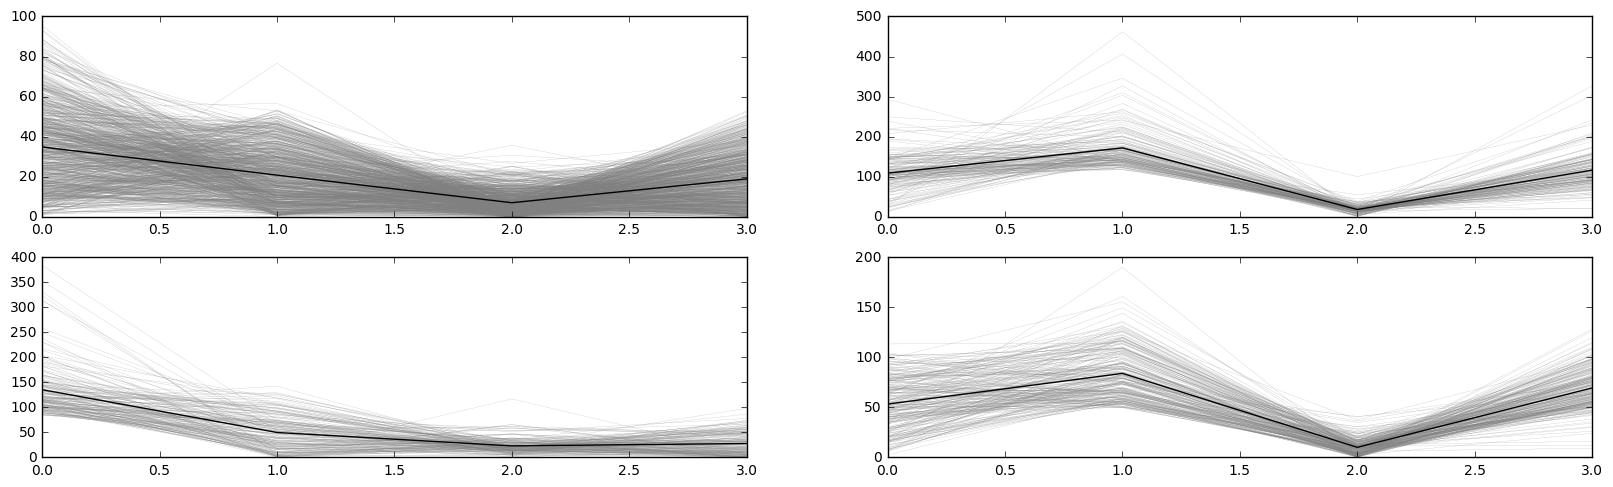

In [630]:
num_clust = 4
clusters = KMeans(n_clusters=num_clust).fit(X)
cluster_assignments = clusters.predict(X)
# plt.subplot(num_clust+1,1,1)
# plt.plot(cluster_assignments[:150])
# plt.ylim([0.2,1.1])
fig2 = plt.figure(figsize=(20,15))
for cluster_id in range(len(clusters.cluster_centers_)):
    plt.subplot(num_clust+1,2,cluster_id+1)
    cluster_members = X[cluster_assignments==cluster_id,:]
    print(len(cluster_members))
    for i in range(len(cluster_members)):
        plt.plot(cluster_members[i,:], color='grey', lw='0.1')
    plt.plot(clusters.cluster_centers_[cluster_id,:], color='k', lw='1')

In [631]:
cluster_assignments

array([0, 0, 0, ..., 0, 0, 1])

In [632]:
y['assignment']=cluster_assignments
y=y.join(data['PBA'],how='inner')

The connection between assignment and building type need to be found by visually judging. The connecting can be different every time the file was run.

In [633]:
y['judge']=1
y['judge'].iloc[np.where(np.array(y.PBA)==2)]=1 # This number assignment requires visually judging.
y['judge'].iloc[np.where(np.array(y.PBA)==13)]=3
y['judge'].iloc[np.where(np.array(y.PBA)==16)]=0
y['judge'].iloc[np.where(np.array(y.PBA)==26)]=2
y[y['judge']==y['assignment']].count()


C:\Users\thong\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


ELBTU         79
NGBTU         79
ELVNBTU       79
NGHTBTU       79
assignment    79
PBA           79
judge         79
dtype: int64

In [611]:
a=324/(139+434+23+58)

In [612]:
a

0.4954128440366973